<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python46_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# seaborn 패키지를 사용한 시각화

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tips = sns.load_dataset('tips')
tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 히스토그램(Histogram)

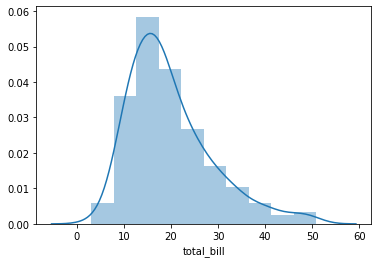

In [11]:
# seaborn 패키지의 그래프 함수들은 pyplot의 Subplot 객체를 리턴.

# distplot: distribution plot
sns.distplot(tips['total_bill'], 
             bins=10,    # 막대 개수
             hist=True,  # 히스토그램을 그릴 지 여부(True 기본값), histogram
             kde=True   # 밀도 함수를 그릴 지 여부(True 기본값), kernel density estimation
             )
# kde=False: y축은 데이터 개수, kde=True: y축은 커널 밀도(확률 밀도).
plt.show()

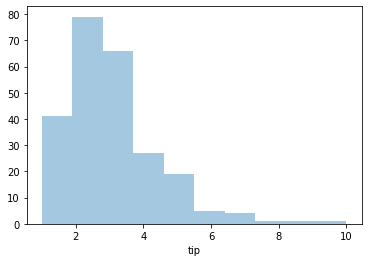

In [14]:
sns.distplot(tips['tip'], bins=10, kde=False)
plt.show()

## 막대 그래프(Count Plot)

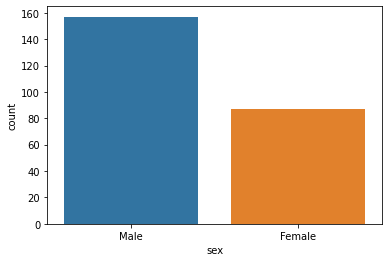

In [15]:
# countplot 함수
sns.countplot(x='sex', data=tips)
plt.show()

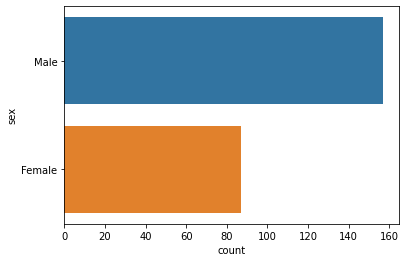

In [16]:
sns.countplot(y='sex', data=tips)
plt.show()

seaborn 패키지를 사용해서 subplot 여러개를 그리는 방법
*   pyplot의 함수를 사용해서 subplot들을 생성: add_subplot, subplots
*   seaborn 패키지의 함수들을 사용해서 원하는 subplot 위치에 그래프를 그림.

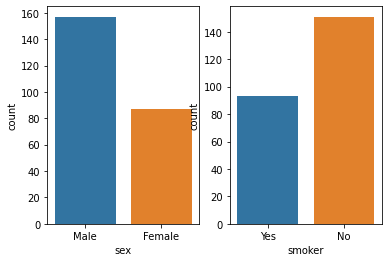

In [27]:
# figure, subplot 객체를 생성
fig, axes = plt.subplots(nrows=1, ncols=2)

# seaborn 패키지의 함수들을 사용해서 원하는 위치에 그래프 그림.
sns.countplot(x='sex', data=tips, ax=axes[0])
sns.countplot(x='smoker', data=tips, ax=axes[1])

plt.show()

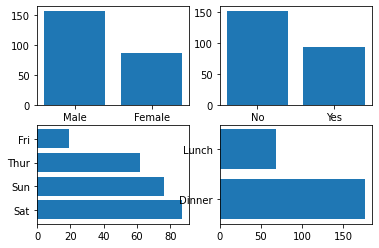

In [42]:
# subplot을 (2, 2) shape을 생성
# 성별, 흡연, 요일, 시간의 countplot을 그려보세요.
# matplotlib.pyplot 이용

sex_count = tips['sex'].value_counts()
smoker_count = tips['smoker'].value_counts()
day_count = tips['day'].value_counts()
time_count = tips['time'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=2)
# axes[0][0]: Python의 list, numpy.ndarry에서 인덱스를 사용하는 방법
# axes[0, 0]: numpy.ndarray에서 인덱스를 사용하는 방법
axes[0, 0].bar(x=sex_count.index, height=sex_count.values)
axes[0, 1].bar(x=smoker_count.index, height=smoker_count.values)
axes[1, 0].barh(y=day_count.index, width=day_count.values)
axes[1, 1].barh(y=time_count.index, width=time_count.values)

plt.show()

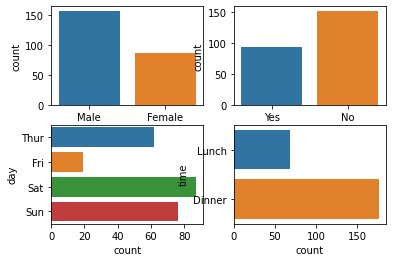

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.countplot(x='sex', data=tips, ax=axes[0, 0])
sns.countplot(x='smoker', data=tips, ax=axes[0, 1])
sns.countplot(y='day', data=tips, ax=axes[1, 0])
sns.countplot(y='time', data=tips, ax=axes[1, 1])

plt.show()

In [47]:
# 요일별 남성/여성 숫자
days = ['Thur', 'Fri', 'Sat', 'Sun']
for d in days:
    print('=====', d, '=====')
    print(tips[tips['day'] == d]['sex'].value_counts())

===== Thur =====
Female    32
Male      30
Name: sex, dtype: int64
===== Fri =====
Male      10
Female     9
Name: sex, dtype: int64
===== Sat =====
Male      59
Female    28
Name: sex, dtype: int64
===== Sun =====
Male      58
Female    18
Name: sex, dtype: int64


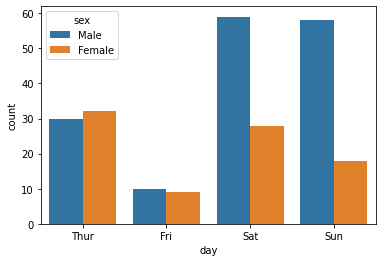

In [49]:
sns.countplot(data=tips, x='day', hue='sex')
plt.show()

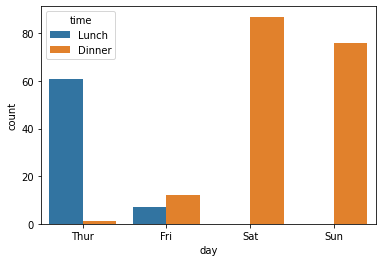

In [50]:
# 요일별 lunch/dinner의 빈도수 그래프
sns.countplot(x='day', hue='time', data=tips)
plt.show()

## 막대 그래프(Bar Plot)

In [55]:
# 성별 tip의 평균
print(tips[tips['sex'] == 'Male']['tip'].mean())  # 남성들의 tip의 평균
print(tips[tips['sex'] == 'Female']['tip'].mean())  # 여성들의 tip의 평균

3.0896178343949052
2.833448275862069


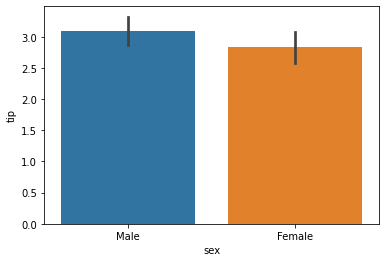

In [56]:
sns.barplot(x='sex', y='tip', data=tips)
plt.show()

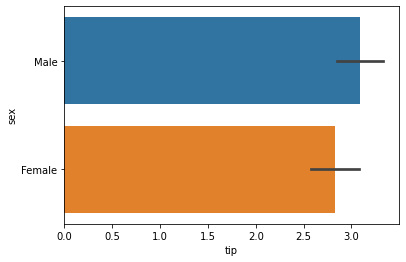

In [57]:
sns.barplot(x='tip', y='sex', data=tips)
plt.show()

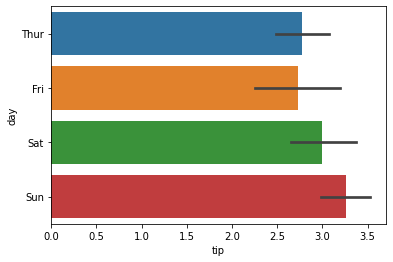

In [58]:
# 요일별 tip의 평균 가로 막대 그래프로 표현
sns.barplot(x='tip', y='day', data=tips)
plt.show()

In [59]:
# 파생 변수: 데이터 프레임의 변수(컬럼)들을 이용해서 만든 새로운 변수(컬럼)
# tip_pct = tip / total_bill * 100
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100
tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


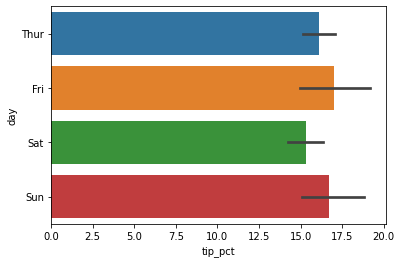

In [60]:
# 요일별 팁 비율의 평균 가로 막대 그래프
sns.barplot(x='tip_pct', y='day', data=tips)
plt.show()

In [63]:
tips[tips['day'] == 'Sun']['tip_pct'].mean()

16.689728635113465

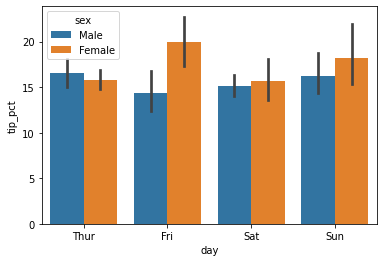

In [64]:
# 요일별, 성별 tip_pct의 평균 막대 그래프
sns.barplot(data=tips, x='day', y='tip_pct', hue='sex')
plt.show()

## 산점도 그래프(Scatter Plot)

*   scatterplot
*   regplot: regression plot
*   jointplot: 산점도 + 히스토그램


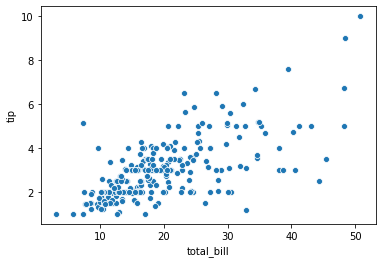

In [65]:
# tip ~ total_bill
sns.scatterplot(data=tips, x='total_bill', y='tip', )
plt.show()

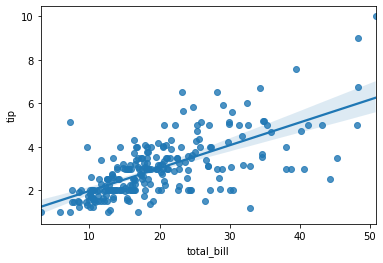

In [66]:
# regression plot(회귀 그래프): 산점도 + 회귀 직선
sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()

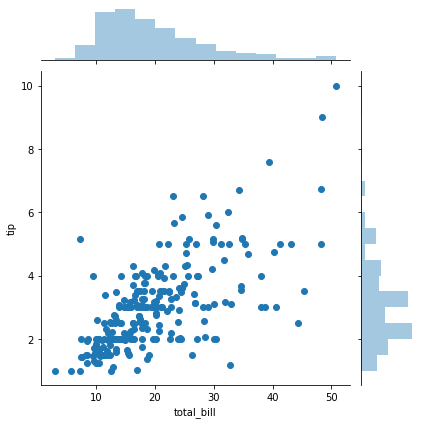

In [68]:
# joint plot: scatter + histogram
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

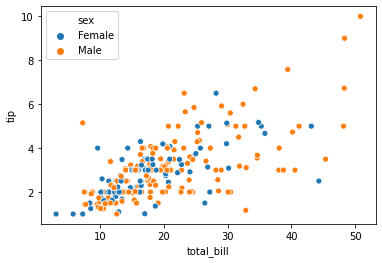

In [69]:
# scatter plot (tip ~ total_bill), 점의 색깔 ~ 성별
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

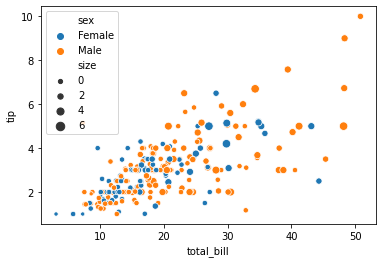

In [71]:
# scatter plot (tip ~ total_bill), 점의 색깔 ~ 성별, 점의 크기 ~ size
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size')
plt.show()

## Box Plot

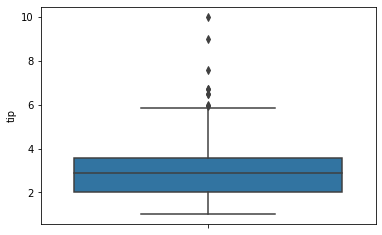

In [72]:
sns.boxplot(y='tip', data=tips)
plt.show()

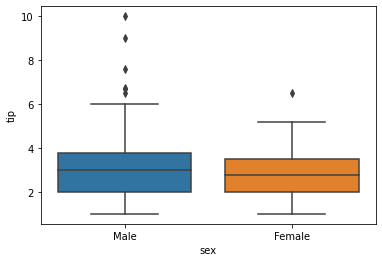

In [73]:
# 성별 tip의 기술 통계량 box plot
sns.boxplot(x='sex', y='tip', data=tips)
plt.show()

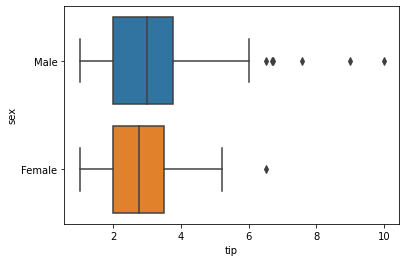

In [74]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

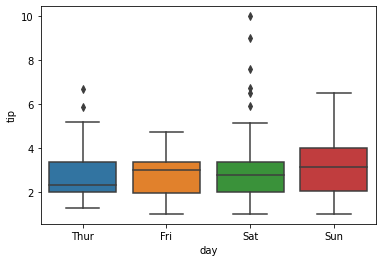

In [75]:
# 요일별 tip의 기술 통계량 box plot
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

## Category Plot

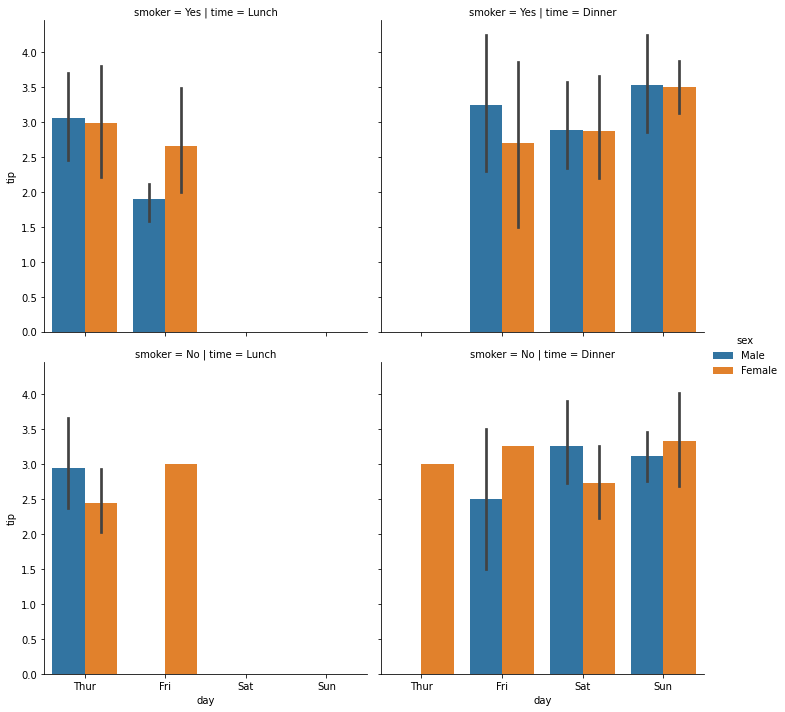

In [80]:
# 막대 그래프: x축=요일, y축=tip 평균, 막대색깔=성별
# sns.barplot(data=tips, x='day', y='tip', hue='sex')

# catplot: category plot
# x축=요일, y축=tip평균, 막대색깔=성별, row=흡연여부,col=시간
sns.catplot(data=tips, x='day', y='tip', hue='sex', kind='bar',
            row='smoker', col='time')
plt.show()